# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [8]:
jason_1 = '/Users/mama/Data Wrangling/Data/world_bank_projects.json'
jason_2 = 'Data/world_bank_projects_less.json'

In [9]:
json.load((open(jason_1)))

[{'sector': [{'Name': 'Primary education'},
   {'Name': 'Secondary education'},
   {'Name': 'Public administration- Other social services'},
   {'Name': 'Tertiary education'}],
  'supplementprojectflg': 'N',
  'projectfinancialtype': 'IDA',
  'prodline': 'PE',
  'mjtheme': ['Human development'],
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'project_name': 'Ethiopia General Education Quality Improvement Project II',
  'mjthemecode': '8,11',
  'closingdate': '2018-07-07T00:00:00Z',
  'totalcommamt': 130000000,
  'id': 'P129828',
  'mjsector_namecode': [{'code': 'EX', 'name': 'Education'},
   {'code': 'EX', 'name': 'Education'},
   {'code': 'BX', 'name': 'Public Administration, Law, and Justice'},
   {'code': 'EX', 'name': 'Education'}],
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'sector1': {'Percent': 46, 'Name': 'Primary education'},
  'lendinginstr': 'Investment Project Financing',
  'countrycode': 'ET',
  '

In [10]:
!pwd

/Users/mama/Data Wrangling


In [11]:
projects = pd.read_json(jason_1)

In [12]:
projects.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


In [13]:
projects.isnull().sum()

_id                           0
approvalfy                    0
board_approval_month          0
boardapprovaldate             0
borrower                     15
closingdate                 130
country_namecode              0
countrycode                   0
countryname                   0
countryshortname              0
docty                        54
envassesmentcategorycode     70
grantamt                      0
ibrdcommamt                   0
id                            0
idacommamt                    0
impagency                    28
lendinginstr                  5
lendinginstrtype              5
lendprojectcost               0
majorsector_percent           0
mjsector_namecode             0
mjtheme                       9
mjtheme_namecode              0
mjthemecode                   0
prodline                      0
prodlinetext                  0
productlinetype               0
project_abstract            138
project_name                  0
projectdocs                  54
projectf

In [14]:
projects_nona =projects.dropna()

In [15]:
projects_nona.isnull().sum()

_id                         0
approvalfy                  0
board_approval_month        0
boardapprovaldate           0
borrower                    0
closingdate                 0
country_namecode            0
countrycode                 0
countryname                 0
countryshortname            0
docty                       0
envassesmentcategorycode    0
grantamt                    0
ibrdcommamt                 0
id                          0
idacommamt                  0
impagency                   0
lendinginstr                0
lendinginstrtype            0
lendprojectcost             0
majorsector_percent         0
mjsector_namecode           0
mjtheme                     0
mjtheme_namecode            0
mjthemecode                 0
prodline                    0
prodlinetext                0
productlinetype             0
project_abstract            0
project_name                0
projectdocs                 0
projectfinancialtype        0
projectstatusdisplay        0
regionname

In [16]:
projects_nona.head(10)

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
32,{'$oid': '52b213b38594d8a2be17c7a0'},2014,September,2013-09-26T00:00:00Z,FEDERAL REPUBLIC OF NIGERIA,2018-12-31T00:00:00Z,Federal Republic of Nigeria!$!NG,NG,Federal Republic of Nigeria,Nigeria,...,"EV,FK,YC,FC",IBRD,Active,N,"{'Percent': 5, 'Name': 'Land administration an...","[{'code': '83', 'name': 'Land administration a...","41,83",300000000,300000000,http://www.worldbank.org/projects/P131973/hous...
57,{'$oid': '52b213b38594d8a2be17c7b9'},2014,August,2013-08-28T00:00:00Z,GOVERNMENT OF INDIA,2020-10-31T00:00:00Z,Republic of India!$!IN,IN,Republic of India,India,...,"AB,AH,WZ,AI",IBRD,Active,N,"{'Percent': 25, 'Name': 'Water resource manage...","[{'code': '85', 'name': 'Water resource manage...","78,79,25,85",360000000,360000000,http://www.worldbank.org/projects/P122770/utta...
61,{'$oid': '52b213b38594d8a2be17c7bd'},2014,August,2013-08-08T00:00:00Z,GOVERNMENT OF COTE D'IVOIRE,2017-10-30T00:00:00Z,Republic of Cote d'Ivoire!$!CI,CI,Republic of Cote d'Ivoire,Cote d'Ivoire,...,"BL,YA,AH,AB,TI",IBRD,Active,N,"{'Percent': 25, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","77,78,56,45",50000000,50000000,http://www.worldbank.org/projects/P119308/agri...
95,{'$oid': '52b213b38594d8a2be17c7df'},2013,June,2013-06-28T00:00:00Z,GOVERNMENT OF GUINEA,2017-12-31T00:00:00Z,Republic of Guinea!$!GN,GN,Republic of Guinea,Guinea,...,"YZ,FH,YA,BC,FR",IBRD,Active,N,"{'Percent': 13, 'Name': 'Regulation and compet...","[{'code': '40', 'name': 'Regulation and compet...","41,34,40",10000000,10000000,http://www.worldbank.org/projects/P128443/guin...
98,{'$oid': '52b213b38594d8a2be17c7e2'},2013,June,2013-06-28T00:00:00Z,GOVERNMENT OF NEPAL,2019-12-31T00:00:00Z,South Asia!$!8S,8S,South Asia,South Asia,...,"BT,BV,YY,YZ,TI",IBRD,Active,N,"{'Percent': 25, 'Name': 'Trade facilitation an...","[{'code': '49', 'name': 'Trade facilitation an...","47,39,49",99000000,99000000,http://www.worldbank.org/projects/P144335/nepa...
100,{'$oid': '52b213b38594d8a2be17c7e4'},2013,June,2013-06-27T00:00:00Z,MINISTRY OF FINANCE,2021-12-31T00:00:00Z,Republic of Kazakhstan!$!KZ,KZ,Republic of Kazakhstan,Kazakhstan,...,"BC,AZ,AB,AI",IBRD,Active,N,"{'Percent': 1, 'Name': 'Water resource managem...","[{'code': '85', 'name': 'Water resource manage...","78,79,77,85",102900000,102900000,http://www.worldbank.org/projects/P086592/seco...
108,{'$oid': '52b213b38594d8a2be17c7ec'},2013,June,2013-06-26T00:00:00Z,GOVERNMENT OF BANGLADESH,2020-12-31T00:00:00Z,People's Republic of Bangladesh!$!BD,BD,People's Republic of Bangladesh,Bangladesh,...,"AT,WZ,JB,WD",IBRD,Active,N,"{'Percent': 45, 'Name': 'Water resource manage...","[{'code': '85', 'name': 'Water resource manage...","62,82,57,52,85",375000000,375000000,http://www.worldbank.org/projects/P128276/coas...
111,{'$oid': '52b213b38594d8a2be17c7ef'},2013,June,2013-06-25T00:00:00Z,STATE GOVERNMENT OF RIO GRANDE DO NORTE,2019-05-31T00:00:00Z,Federative Republic of Brazil!$!BR,BR,Federative Republic of Brazil,Brazil,...,"JA,BS,EZ,AZ,BH",IBRD,Active,N,"{'Percent': 11, 'Name': 'Health system perform...","[{'code': '67', 'name': 'Health system perform...","25,65,59,75,67",360000000,360000000,http://www.worldbank.org/projects/P126452/rio-...
113,{'$oid': '52b213b38594d8a2be17c7f1'},2013,June,2013-06-24T00:00:00Z,REPUBLIC OF CAPE VERDE,2019-06

In [17]:
projects.columns

Index(['_id', 'approvalfy', 'board_approval_month', 'boardapprovaldate',
       'borrower', 'closingdate', 'country_namecode', 'countrycode',
       'countryname', 'countryshortname', 'docty', 'envassesmentcategorycode',
       'grantamt', 'ibrdcommamt', 'id', 'idacommamt', 'impagency',
       'lendinginstr', 'lendinginstrtype', 'lendprojectcost',
       'majorsector_percent', 'mjsector_namecode', 'mjtheme',
       'mjtheme_namecode', 'mjthemecode', 'prodline', 'prodlinetext',
       'productlinetype', 'project_abstract', 'project_name', 'projectdocs',
       'projectfinancialtype', 'projectstatusdisplay', 'regionname', 'sector',
       'sector1', 'sector2', 'sector3', 'sector4', 'sector_namecode',
       'sectorcode', 'source', 'status', 'supplementprojectflg', 'theme1',
       'theme_namecode', 'themecode', 'totalamt', 'totalcommamt', 'url'],
      dtype='object')

In [18]:
projects_country = pd.DataFrame(projects_nona, columns=['boardapprovaldate', 'borrower', 'countrycode', 'totalamt', 'grantamt'])

In [19]:
projects_country2 = pd.pivot_table(projects_country, index='countrycode')

In [20]:
projects_country2.index

Index(['3A', '8S', 'AG', 'AL', 'BA', 'BD', 'BF', 'BI', 'BO', 'BR', 'BT', 'CI',
       'CN', 'CV', 'ET', 'GE', 'GH', 'GN', 'GZ', 'HN', 'HT', 'ID', 'IN', 'KE',
       'KG', 'KZ', 'LA', 'LR', 'MA', 'MD', 'MG', 'MM', 'MV', 'MZ', 'NE', 'NG',
       'NI', 'NP', 'PE', 'RY', 'SN', 'SS', 'TD', 'TG', 'TJ', 'UG', 'VN', 'ZM',
       'ZR'],
      dtype='object', name='countrycode')

In [21]:
continents = {'CN':'Asia', 'BD':'Asia', 'ID':'Asia', 'IN':'Asia', 'LA':'Asia', 'MV':'Asia', 'NP':'Asia', 'TJ':'Asia', 'VN':'Asia', 'UG':'Africa', 'SS':'Africa', 'ET':'Africa', 'BF':'Africa', 'BI':'Africa', 'BT':'Africa', 'GH':'Africa', 'GN':'Africa', 'KE':'Africa', 'LR':'Africa', 'MA':'Africa', 'MM':'Africa', 'MZ':'Africa', 'NE':'Africa', 'NG':'Africa', 'NI':'Africa', 'SN':'Africa', 'TD':'Africa', 'TG':'Africa', 'ZM':'Africa', 'ZR':'Africa','BO':'South America', 'BR':'South America', 'CV':'South America', 'HN':'South America', 'HT':'South America', 'PE':'South America', 'RY':'South America', 'CI':'Europe', 'GE':'Europe', 'MD':'Europe', '3A':'Other', '8S':'Other', 'AG':'Other', 'AL':'Other', 'BA':'Other', 'GZ':'Other', 'KZ':'Other',  'KG':'Other', 'MG':'Other'}

In [22]:
projects_country['Continent'] = projects_country['countrycode'].apply(lambda x: continents[x])

In [23]:
projects_country['Continent']

0             Africa
32            Africa
57              Asia
61            Europe
95            Africa
98             Other
100            Other
108             Asia
111    South America
113    South America
117           Africa
122             Asia
125           Africa
137           Africa
148           Africa
151            Other
162             Asia
164             Asia
165             Asia
168           Africa
175           Africa
177            Other
180           Africa
185    South America
186    South America
199             Asia
204           Africa
207           Africa
211            Other
213           Africa
           ...      
287            Other
294           Africa
296            Other
315             Asia
317    South America
318    South America
342    South America
351           Africa
360           Africa
375    South America
377             Asia
383            Other
387            Other
396             Asia
403           Africa
408           Africa
417          

In [24]:
test_df = projects_country.groupby('Continent')

Continent
Africa           AxesSubplot(0.125,0.125;0.775x0.755)
Asia             AxesSubplot(0.125,0.125;0.775x0.755)
Europe           AxesSubplot(0.125,0.125;0.775x0.755)
Other            AxesSubplot(0.125,0.125;0.775x0.755)
South America    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

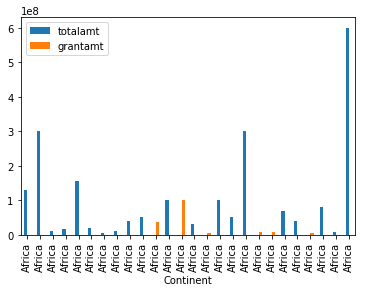

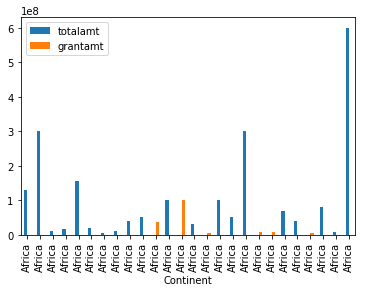

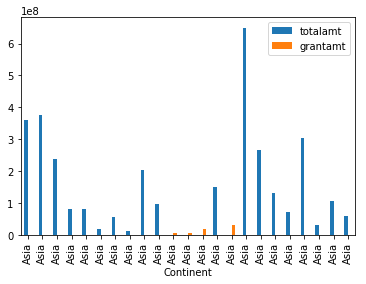

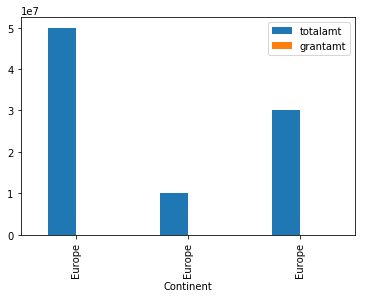

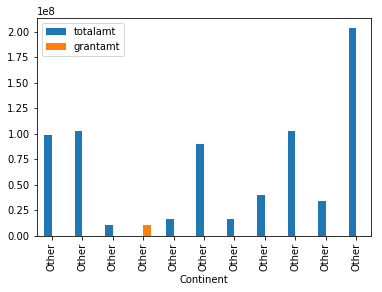

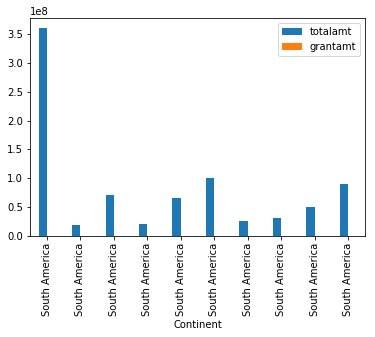

In [25]:
test_df.plot.bar(x='Continent')

In [26]:
projects_country.count()

boardapprovaldate    73
borrower             73
countrycode          73
totalamt             73
grantamt             73
Continent            73
dtype: int64

In [27]:
projects.columns

Index(['_id', 'approvalfy', 'board_approval_month', 'boardapprovaldate',
       'borrower', 'closingdate', 'country_namecode', 'countrycode',
       'countryname', 'countryshortname', 'docty', 'envassesmentcategorycode',
       'grantamt', 'ibrdcommamt', 'id', 'idacommamt', 'impagency',
       'lendinginstr', 'lendinginstrtype', 'lendprojectcost',
       'majorsector_percent', 'mjsector_namecode', 'mjtheme',
       'mjtheme_namecode', 'mjthemecode', 'prodline', 'prodlinetext',
       'productlinetype', 'project_abstract', 'project_name', 'projectdocs',
       'projectfinancialtype', 'projectstatusdisplay', 'regionname', 'sector',
       'sector1', 'sector2', 'sector3', 'sector4', 'sector_namecode',
       'sectorcode', 'source', 'status', 'supplementprojectflg', 'theme1',
       'theme_namecode', 'themecode', 'totalamt', 'totalcommamt', 'url'],
      dtype='object')

In [28]:
projects2 = projects.drop(columns=['sector2'])

In [29]:
projects2.columns

Index(['_id', 'approvalfy', 'board_approval_month', 'boardapprovaldate',
       'borrower', 'closingdate', 'country_namecode', 'countrycode',
       'countryname', 'countryshortname', 'docty', 'envassesmentcategorycode',
       'grantamt', 'ibrdcommamt', 'id', 'idacommamt', 'impagency',
       'lendinginstr', 'lendinginstrtype', 'lendprojectcost',
       'majorsector_percent', 'mjsector_namecode', 'mjtheme',
       'mjtheme_namecode', 'mjthemecode', 'prodline', 'prodlinetext',
       'productlinetype', 'project_abstract', 'project_name', 'projectdocs',
       'projectfinancialtype', 'projectstatusdisplay', 'regionname', 'sector',
       'sector1', 'sector3', 'sector4', 'sector_namecode', 'sectorcode',
       'source', 'status', 'supplementprojectflg', 'theme1', 'theme_namecode',
       'themecode', 'totalamt', 'totalcommamt', 'url'],
      dtype='object')

In [30]:
projects.loc[:, ['countryname', 'totalamt', 'grantamt']]

,countryname,totalamt,grantamt
0,Federal Democratic Republic of Ethiopia,130000000,0
1,Republic of Tunisia,0,4700000
2,Tuvalu,6060000,0
3,Republic of Yemen,0,1500000
4,Kingdom of Lesotho,13100000,0
5,Republic of Kenya,10000000,0
6,Republic of India,500000000,0
7,People's Republic of China,0,27280000
8,Republic of India,160000000,0
9,Kingdom of Morocco,200000000,0


In [31]:
projects_country.columns

Index(['boardapprovaldate', 'borrower', 'countrycode', 'totalamt', 'grantamt',
       'Continent'],
      dtype='object')

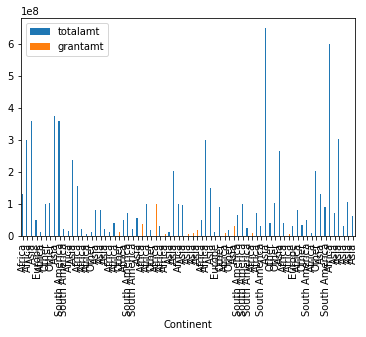

In [32]:
projects_country.plot.bar(x='Continent')

In [33]:
continent_Chart = projects_country.groupby(['Continent']).sum()

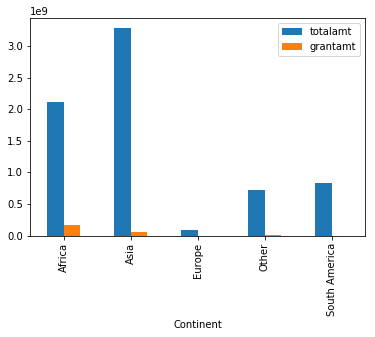

In [34]:
continent_Chart.plot.bar()

This plot shows the total amount of funding given to NGO projects by Continent. Based on the data, most World Banks investments are in Africa and Asia, with independent island chains and South America being the next-most funded and Europe trailing behind.

In [35]:
projects.groupby(['countryname']).sum()

,approvalfy,grantamt,ibrdcommamt,idacommamt,lendprojectcost,totalamt,totalcommamt
countryname,,,,,,,
Africa,22148,31930000,0,987900000,1759560000,987900000,1019830000
Antigua and Barbuda,2013,0,10000000,0,10000000,10000000,10000000
Arab Republic of Egypt,4026,30000,585400000,0,2404430000,585400000,585430000
Argentine Republic,4027,5860000,0,0,5860000,0,5860000
Bosnia and Herzegovina,2013,0,0,34100000,34100000,34100000,34100000
Burkina Faso,18117,11260000,0,335000000,435130000,335000000,346260000
Central African Republic,2013,250000,0,0,250000,0,250000
Democratic Republic of Sao Tome and Prin,4027,100000,0,5500000,5600000,5500000,5600000
Democratic Republic of Timor-Leste,4027,17700000,15000000,25000000,109700000,40000000,57700000


In [36]:
projects['Count_Total'] = projects['countryname'].count()

In [37]:
projects

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url,Count_Total
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...,500
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en,500
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en,500
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en,500
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...,500
5,{'$oid': '52b213b38594d8a2be17c785'},2014,October,2013-10-31T00:00:00Z,REPUBLIC OF KENYA,NaN,Republic of Kenya!$!KE,KE,Republic of Kenya,Kenya,...,IBRD,Active,Y,"{'Percent': 100, 'Name': 'Social safety nets'}","[{'code': '54', 'name': 'Social safety nets'}]",54,10000000,10000000,http://www.worldbank.org/projects/P146161?lang=en,500
6,{'$oid': '52b213b38594d8a2be17c786'},2014,October,2013-10-29T00:00:00Z,GOVERNMENT OF INDIA,2019-06-30T00:00:00Z,Republic of India!$!IN,IN,Republic of India,India,...,IBRD,Active,N,"{'Percent': 20, 'Name': 'Administrative and ci...","[{'code': '25', 'name': 'Administrative and ci...","39,25",500000000,500000000,http://www.worldbank.org/projects/P121185/firs...,500
7,{'$oid': '52b213b38594d8a2be17c787'},2014,October,2013-10-29T00:00:00Z,PEOPLE'S REPUBLIC OF CHINA,NaN,People's Republic of China!$!CN,CN,People's Republic of China,China,...,IBRD,Active,N,"{'Percent': 100, 'Name': 'Climate change'}","[{'code': '81', 'name': 'Climate change'}]",81,0,27280000,http://www.worldbank.org/projects/P127033/chin...,500
8,{'$oid': '52b213b38594d8a2be17c788'},2014,October,2013-10-29T00:00:00Z,THE GOVERNMENT OF INDIA,2018-12-31T00:00:00Z,Republic of India!$!IN,IN,Republic of India,India,...,IBRD,Active,N,"{'Percent': 87, 'Name': 'Other rural developme...","[{'code': '79', 'name': 'Other rural developme...",79,160000000,160000000,http://www.worldbank.org/projects/P130164/raja...,500
9,{'$oid': '52b213b38594d8a2be17c789'},2014,October,2013-10-29T00:00:00Z,THE KINGDOM OF MOROCCO,2014-12-31T00:00:00Z,Kingdom of Morocco!$!MA,MA,Kingdom of Morocco,Morocco,...,IBRD,Active,N,"{'Percent': 33, 'Name': 'Other accountability/...","[{'code': '29', 'name': 'Other accountability/...","27,30,29",200000000,200000000,http://www.worldbank.org/projects/P130903?lang=en,500


In [38]:
num_projects_country = projects['countryname'].value_counts().head(10)

In [39]:
quest_2 =pd.DataFrame(projects['mjtheme_namecode'])

In [40]:
projects.mjtheme_namecode

0      [{'code': '8', 'name': 'Human development'}, {...
1      [{'code': '1', 'name': 'Economic management'},...
2      [{'code': '5', 'name': 'Trade and integration'...
3      [{'code': '7', 'name': 'Social dev/gender/incl...
4      [{'code': '5', 'name': 'Trade and integration'...
5      [{'code': '6', 'name': 'Social protection and ...
6      [{'code': '2', 'name': 'Public sector governan...
7      [{'code': '11', 'name': 'Environment and natur...
8      [{'code': '10', 'name': 'Rural development'}, ...
9      [{'code': '2', 'name': 'Public sector governan...
10     [{'code': '10', 'name': 'Rural development'}, ...
11     [{'code': '10', 'name': 'Rural development'}, ...
12                           [{'code': '4', 'name': ''}]
13     [{'code': '5', 'name': 'Trade and integration'...
14     [{'code': '6', 'name': 'Social protection and ...
15     [{'code': '10', 'name': 'Rural development'}, ...
16     [{'code': '10', 'name': 'Rural development'}, ...
17     [{'code': '8', 'name': '

In [41]:
flatten_lst = [item for sublist in projects['mjtheme_namecode'] for item in sublist]

In [57]:
mapping = quest_2[quest_2.name!=''].drop_duplicates()

In [58]:
mapping

,code,name
0,8,Human development
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
8,7,Social dev/gender/inclusion
11,4,Financial and private sector development
18,10,Rural development
53,9,Urban development


In [60]:
mapped = {k: v for k, v in zip(mapping['code'], mapping['name'])}

In [43]:
quest_2 = pd.DataFrame(flatten_lst)

In [61]:
quest_2['clean_name'] = quest_2['code'].apply(lambda x: mapped[x])

Answer to Question 2:

In [62]:
quest_2

,code,name,clean_name
0,8,Human development,Human development
1,11,,Environment and natural resources management
2,1,Economic management,Economic management
3,6,Social protection and risk management,Social protection and risk management
4,5,Trade and integration,Trade and integration
5,2,Public sector governance,Public sector governance
6,11,Environment and natural resources management,Environment and natural resources management
7,6,Social protection and risk management,Social protection and risk management
8,7,Social dev/gender/inclusion,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion,Social dev/gender/inclusion


In [54]:
quest_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 2 columns):
code    1499 non-null object
name    1499 non-null object
dtypes: object(2)
memory usage: 23.5+ KB


Here 

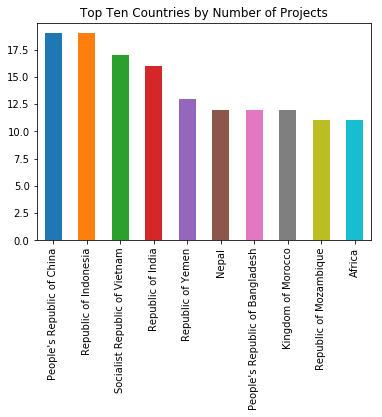

In [47]:
num_projects_country.plot.bar(title='Top Ten Countries by Number of Projects')

In [48]:
top_ten_countries = projects.groupby(['countryname']).count()

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <BarContainer object of 118 artists> has a label of '_id' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


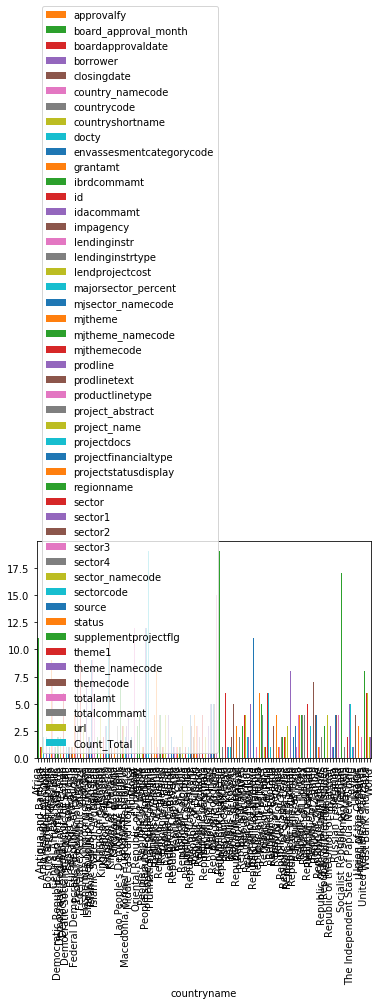

In [49]:
top_ten_countries.plot.bar()

In [50]:
top_ten_countries.columns


Index(['_id', 'approvalfy', 'board_approval_month', 'boardapprovaldate',
       'borrower', 'closingdate', 'country_namecode', 'countrycode',
       'countryshortname', 'docty', 'envassesmentcategorycode', 'grantamt',
       'ibrdcommamt', 'id', 'idacommamt', 'impagency', 'lendinginstr',
       'lendinginstrtype', 'lendprojectcost', 'majorsector_percent',
       'mjsector_namecode', 'mjtheme', 'mjtheme_namecode', 'mjthemecode',
       'prodline', 'prodlinetext', 'productlinetype', 'project_abstract',
       'project_name', 'projectdocs', 'projectfinancialtype',
       'projectstatusdisplay', 'regionname', 'sector', 'sector1', 'sector2',
       'sector3', 'sector4', 'sector_namecode', 'sectorcode', 'source',
       'status', 'supplementprojectflg', 'theme1', 'theme_namecode',
       'themecode', 'totalamt', 'totalcommamt', 'url', 'Count_Total'],
      dtype='object')

In [51]:
question_answer_columns = top_ten_countries.columns.drop(['_id', 'approvalfy', 'board_approval_month', 'boardapprovaldate',
       'closingdate', 'country_namecode', 'countrycode',
       'countryshortname', 'docty', 'envassesmentcategorycode', 'grantamt',
       'ibrdcommamt', 'id', 'idacommamt', 'impagency', 'lendinginstr',
       'lendinginstrtype', 'lendprojectcost',
       'prodline', 'prodlinetext', 'productlinetype', 'project_abstract',
       'project_name', 'projectdocs', 'projectfinancialtype',
       'projectstatusdisplay', 'regionname', 'sector', 'sector1', 'sector2',
       'sector3', 'sector4', 'sector_namecode', 'sectorcode', 'source',
       'status', 'supplementprojectflg', 'theme1', 'theme_namecode',
       'themecode', 'totalamt', 'totalcommamt', 'url'])

In [52]:
top_ten_coutnries['mjtheme']

NameError: name 'top_ten_coutnries' is not defined

In [ ]:
projects2 = projects.drop(['approvalfy', 'ibrdcommamt', 'idacommamt', 'grantamt'], axis=1)

In [ ]:
projects2.groupby(['borrower']).sum()

In [ ]:
Chart = projects2.groupby('countryname').sum()

In [ ]:
Chart.plot.bar(subplots=True)

Add continent columns to datasets and create individual charts for each continent with each of the most important attributes.

In [ ]:
!pwd

In [ ]:
sample_json_df

In [ ]:
json.load((open(jason_2)))

In [ ]:
lesser_data = pd.read_json(jason_2)

In [ ]:
lesser_data.head()

In [ ]:
lesser_data.head()

There's only two items in this dataset.